Integrantes del equipo


*   Laura Elizabeth Martinez Hernandez     1841866
*   Eva Paola Zamora Gutierrez             1851761
*   Analuz Montemyaor Rangel               1842084
*   Diana Patrica Peña Perez               1943553
*   Miguel Angel Rivera Rodriguez          1808094


Profesor: Daniel Isaías Lopez Páez

Día y Hora: jueves, N3

Fecha: 21/11/2021

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

train_images = train_images / 255.0
test_images = test_images / 255.0

169017344/169001437 [==============================] - 11s 0us/step


In [3]:
class_names = ['aquatic mammals', 'fish', 'flowers', 'food containers', 
               'fruit and vegetables', 'household electrical devices', 
               'household furniture', 'insects', 'large carnivores', 
               'large man-made outdoor things', 'large natural outdoor scenes', 
               'large omnivores and hervibores', 'medium-sized mammals', 
               'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 
               'trees', 'vehicles 1', 'vehicles 2']

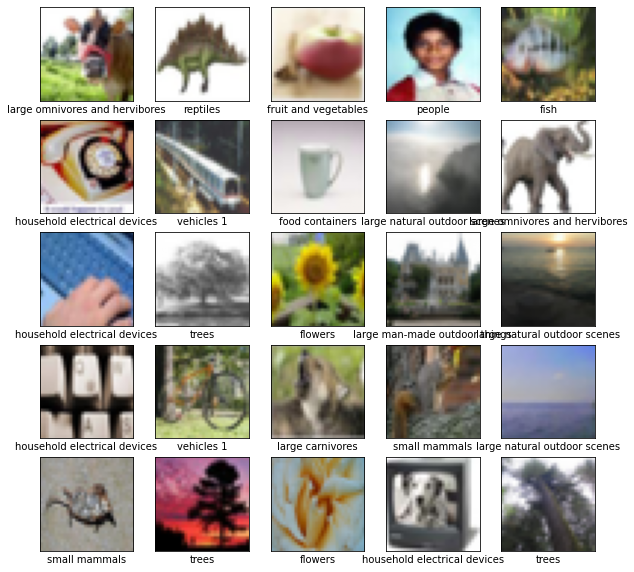

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(75, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(75, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(75, (2, 2), activation='relu'))
model.add(layers.Conv2D(75, (2, 2), activation='relu'))
model.add(layers.Conv2D(75, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(20))

In [17]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)